# Sentiment Classification of Yelp Reviews

Hongpeng Jin &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
469-543-7960 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
<hopenjin@gmail.com> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
[Linkedin](https://www.linkedin.com/in/hongpeng-jin/) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
[Project GitHub Address](https://github.com/hopenjin/DataProject/blob/master/Hongpeng%20Jin_Project_Customer%20Booking%20Prediction%20from%20Expedia%20Clickstream%20Data.ipynb)

Goal: predict the customer sentiment using their review text <br />
Data: [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge)

## 1. First of all, Data processing!!

1. see what the data looks like in these datasets
2. try to build a dataset that contains the columns we need, including reivews.stars, reivews.text, business.state
3. clean the text into bag of words for this project


Let the data flow now! ~ ~ ~ 

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import json

review = []
for line in open('C:/Users/hopen/Desktop/Data-Analytics/yelp_dataset/review.json','r',encoding="utf8"):
    review.append(json.loads(line))

review[0]

{'review_id': 'Q1sbwvVQXV2734tPgoKj4Q',
 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA',
 'business_id': 'ujmEBvifdJM6h6RLv4wQIg',
 'stars': 1.0,
 'useful': 6,
 'funny': 1,
 'cool': 0,
 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.',
 'date': '2013-05-07 04:34:36'}

In [3]:
business = []
for line in open('C:/Users/hopen/Desktop/Data-Analytics/yelp_dataset/business.json','r',encoding="utf8"):
    business.append(json.loads(line))

business[0]

{'business_id': '1SWheh84yJXfytovILXOAQ',
 'name': 'Arizona Biltmore Golf Club',
 'address': '2818 E Camino Acequia Drive',
 'city': 'Phoenix',
 'state': 'AZ',
 'postal_code': '85016',
 'latitude': 33.5221425,
 'longitude': -112.0184807,
 'stars': 3.0,
 'review_count': 5,
 'is_open': 0,
 'attributes': {'GoodForKids': 'False'},
 'categories': 'Golf, Active Life',
 'hours': None}

Wow! these are the dataset looks like~ Amazing! <br />
BTW, It is really fun to see these. How about you? 

In [4]:
# change json fomart into dataframe fomart
import pandas as pd
df_review = pd.DataFrame.from_dict(review)
df_business = pd.DataFrame.from_dict(business)

# combine these two datasets
df = pd.merge(df_review[['business_id','stars','text']],df_business[['business_id','state']],on='business_id',how='left')

In [5]:
df.head()

,business_id,stars,text,state
0,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...,NV
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,NV
2,WTqjgwHlXbSFevF32_DJVw,5.0,I have to say that this office really has it t...,AZ
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,Went in for a lunch. Steak sandwich was delici...,AB
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,Today was my second out of three sessions I ha...,AZ


For here, I only keep Ohio data for further discovering, because the dataset is super large. If your computer ram is only 8Gb RAM or even less, I strongly recommend you do not try this code in you cute video player(Just kidding, hah : )!

In [6]:
# keep the Ohio data, and delete the data['stars'] == 3.0, which would influence our model accuar
df_Ohio = df.loc[df.state == 'OH']
df_Ohio = df_Ohio[df_Ohio.stars != 3.0]

These texts must be cleaned since we all love things in good trim~ <br />
Deleting punctuation, number,stopword, and any weird stuff...

In [7]:
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df_Ohio['text_cleaned'] = df_Ohio['text'].apply(clean_text)
df_Ohio = df_Ohio.dropna()

In [8]:
# add a new columns for sentiment analysis, we suppose stars_x equal 4 or 5 means good and equal 1 or 2 means bad
def setSentiment(stars):
    if stars > 3:
        return 1
    elif stars < 3:
        return 0 

df_Ohio['sentiment'] = df_Ohio['stars'].apply(setSentiment)

In [9]:
df_Ohio.head()

,business_id,stars,text,state,text_cleaned,sentiment
8,b2jN2mm9Wf3RcrZCgfo1cg,2.0,I was really looking forward to visiting after...,OH,really looking forward visiting beers man owar...,0
16,NyLYY8q1-H3hfsTwuwLPCg,4.0,Great lunch today. Staff was very helpful in a...,OH,great lunch today staff helpful assisting sele...,1
66,FYkm4c2CujTSPpqSM4TbuQ,5.0,"Great tanning salon near me, and clean, equipp...",OH,great tanning salon near clean equipped latest...,1
69,ZNB91myFoOYgyXoG5LQeGQ,1.0,I took my wife out for a Birthday dinner with ...,OH,took wife birthday dinner daughter 121614 alfo...,0
71,anzCdD5eIEHwydTpXhLlUA,4.0,Heard about this place and was dying to check ...,OH,heard place dying check putand im glad decent ...,1


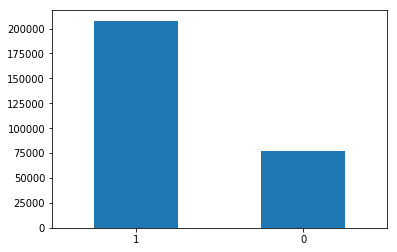

In [11]:
df_Ohio.sentiment.value_counts().plot(kind="bar", rot=0)

Nice customers, Good business, and not bad distribution.

In [12]:
df_Ohio.to_csv ('C:/Users/hopen/Desktop/Data-Analytics/Ohio_reviews.csv', index = None, header=True) 

Now, we get the data that we want!

In [5]:
import pandas as pd

data=pd.read_csv('C:/Users/hopen/Desktop/Data-Analytics/Ohio_reviews.csv')
data.head()

,business_id,stars,text,state,text_cleaned,sentiment,text_cleaned_token
0,b2jN2mm9Wf3RcrZCgfo1cg,2.0,I was really looking forward to visiting after...,OH,really looking forward visiting beers man owar...,0,"['really', 'looking', 'forward', 'visiting', '..."
1,NyLYY8q1-H3hfsTwuwLPCg,4.0,Great lunch today. Staff was very helpful in a...,OH,great lunch today staff helpful assisting sele...,1,"['great', 'lunch', 'today', 'staff', 'helpful'..."
2,FYkm4c2CujTSPpqSM4TbuQ,5.0,"Great tanning salon near me, and clean, equipp...",OH,great tanning salon near clean equipped latest...,1,"['great', 'tanning', 'salon', 'near', 'clean',..."
3,ZNB91myFoOYgyXoG5LQeGQ,1.0,I took my wife out for a Birthday dinner with ...,OH,took wife birthday dinner daughter 121614 alfo...,0,"['took', 'wife', 'birthday', 'dinner', 'daught..."
4,anzCdD5eIEHwydTpXhLlUA,4.0,Heard about this place and was dying to check ...,OH,heard place dying check putand im glad decent ...,1,"['heard', 'place', 'dying', 'check', 'putand',..."


## 2. Text Analytics 

In [6]:
x_data = data['text_cleaned']
y_data = data['sentiment']
#Separate into train and test data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

vectorizers = [
    {'label': 'Bag of Words',   
     'vectorizer': CountVectorizer(analyzer="word", tokenizer=nltk.word_tokenize,
                                   preprocessor=None, stop_words='english', max_features=3000) ,},
    {'label': 'TF-IDF',         
     'vectorizer': TfidfVectorizer(min_df=2, tokenizer=nltk.word_tokenize,
                                  preprocessor=None, stop_words='english'),},    
]

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = [
           {'label': 'Logistic Regression',      'model': LogisticRegression(n_jobs=1, C=1e5),},
           {'label': 'Naive Bayes Classifier ',  'model': MultinomialNB(),},
           {'label': 'Random Forest',            'model': RandomForestClassifier(),},    
           {'label': 'Gradient Boosting',        'model': GradientBoostingClassifier(),},
]

It looks a lot of code here. I could encapsulate them to a good-looking format. However, we could see how the data transfers in these code. In other words, I thought it is more readable, so I keep all here.

BTW, at the beginning, I looped models first and then looped the vectorizers, which means I need to vectorize the train data and test data 3 times than now, what a fool I was!!

------------ BAG OF WORDS ------------
---- Logistic Regression 


C:\Users\hopen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy is 0.9419247528463665
Confusion matrix:
[[19937  2999]
 [ 1959 60477]]
Normalized Confusion matrix:
[[0.86924486 0.13075514]
 [0.03137613 0.96862387]]
---- Naive Bayes Classifier  
Test accuracy is 0.8988192850114791
Confusion matrix:
[[18834  4102]
 [ 4536 57900]]
Normalized Confusion matrix:
[[0.82115452 0.17884548]
 [0.07265039 0.92734961]]
---- Random Forest 


C:\Users\hopen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Test accuracy is 0.8999437754767371
Confusion matrix:
[[18304  4632]
 [ 3910 58526]]
Normalized Confusion matrix:
[[0.79804674 0.20195326]
 [0.06262413 0.93737587]]
---- Gradient Boosting 
Test accuracy is 0.8758140842430774
Confusion matrix:
[[13532  9404]
 [ 1198 61238]]
Normalized Confusion matrix:
[[0.58998954 0.41001046]
 [0.01918765 0.98081235]]
------------ TF-IDF ------------
---- Logistic Regression 


C:\Users\hopen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hopen\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Test accuracy is 0.9155929344515766
Confusion matrix:
[[19433  3503]
 [ 3703 58733]]
Normalized Confusion matrix:
[[0.84727067 0.15272933]
 [0.05930873 0.94069127]]
---- Naive Bayes Classifier  
Test accuracy is 0.8955746614815162
Confusion matrix:
[[15404  7532]
 [ 1383 61053]]
Normalized Confusion matrix:
[[0.67160795 0.32839205]
 [0.02215068 0.97784932]]
---- Random Forest 
Test accuracy is 0.8966991519467741
Confusion matrix:
[[17054  5882]
 [ 2937 59499]]
Normalized Confusion matrix:
[[0.74354726 0.25645274]
 [0.04704017 0.95295983]]
---- Gradient Boosting 
Test accuracy is 0.8766574520920208
Confusion matrix:
[[13650  9286]
 [ 1244 61192]]
Normalized Confusion matrix:
[[0.59513429 0.40486571]
 [0.0199244  0.9800756 ]]


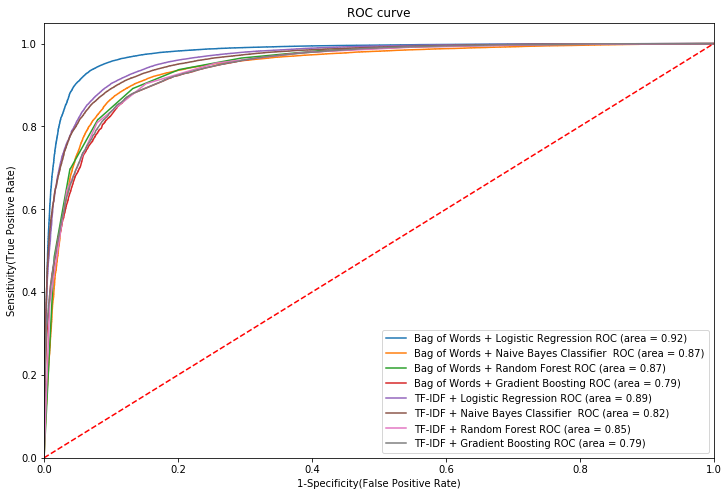

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

# Below for loop iterates through your models list
for v in vectorizers:
    # train the vectorizer
    print('------------ %s ------------' % v['label'].upper())
    vectorizer = v['vectorizer']
    train_data_features = vectorizer.fit_transform(x_train)    
    # use the vectorizer to transfor x_test into vecotr
    test_data_features = vectorizer.transform(x_test)    
    for m in models:
        # train the model and predict y_pred
        print('---- %s ' % m['label'])
        model = m['model'] 
        model = model.fit(train_data_features, y_train)
        y_pred = model.predict(test_data_features)
        
        #  print out model evaluation
        print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred)))
        conf_mat =confusion_matrix(y_test,y_pred)
        print("Confusion matrix:\n%s" % conf_mat)
        conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion matrix:\n%s" % conf_mat_norm)

        # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(test_data_features)[:,1])
        # Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict(test_data_features))
        # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s + %s ROC (area = %0.2f)' % (v['label'], m['label'], auc))
    
# Custom settings for the plot 

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()   # Display

Until now, our project is done. We use BOW and TF-IDF to change the text into vector, so in this way the model could be trained, and finally we got good predictions.

# Further More

## Word2Vec + Keras/Xgboost 

Fancy Word2Vec, Fabulous Keras, and Fantastic Xgboost!

The principle of Word2Vec is vectorization each text by its context to get a vector. The vector of each sentence is the mean of vecotr of its word.

In [9]:
# change the text string into text token list
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

data['text_cleaned_token'] = data['text_cleaned'].apply(tokenize_text)

data.to_csv ('C:/Users/hopen/Desktop/Data-Analytics/Ohio_reviews.csv', index = None, header=True) 
data.head()

,business_id,stars,text,state,text_cleaned,sentiment,text_cleaned_token
0,b2jN2mm9Wf3RcrZCgfo1cg,2.0,I was really looking forward to visiting after...,OH,really looking forward visiting beers man owar...,0,"[really, looking, forward, visiting, beers, ma..."
1,NyLYY8q1-H3hfsTwuwLPCg,4.0,Great lunch today. Staff was very helpful in a...,OH,great lunch today staff helpful assisting sele...,1,"[great, lunch, today, staff, helpful, assistin..."
2,FYkm4c2CujTSPpqSM4TbuQ,5.0,"Great tanning salon near me, and clean, equipp...",OH,great tanning salon near clean equipped latest...,1,"[great, tanning, salon, near, clean, equipped,..."
3,ZNB91myFoOYgyXoG5LQeGQ,1.0,I took my wife out for a Birthday dinner with ...,OH,took wife birthday dinner daughter 121614 alfo...,0,"[took, wife, birthday, dinner, daughter, 12161..."
4,anzCdD5eIEHwydTpXhLlUA,4.0,Heard about this place and was dying to check ...,OH,heard place dying check putand im glad decent ...,1,"[heard, place, dying, check, putand, im, glad,..."


In [17]:
from ast import literal_eval
import pandas as pd
data = pd.read_csv('C:/Users/hopen/Desktop/Data-Analytics/Ohio_reviews.csv')
data['text_cleaned_token'] = data['text_cleaned_token'].apply(literal_eval)
data

,business_id,stars,text,state,text_cleaned,sentiment,text_cleaned_token
0,b2jN2mm9Wf3RcrZCgfo1cg,2.0,I was really looking forward to visiting after...,OH,really looking forward visiting beers man owar...,0,"[really, looking, forward, visiting, beers, ma..."
1,NyLYY8q1-H3hfsTwuwLPCg,4.0,Great lunch today. Staff was very helpful in a...,OH,great lunch today staff helpful assisting sele...,1,"[great, lunch, today, staff, helpful, assistin..."
2,FYkm4c2CujTSPpqSM4TbuQ,5.0,"Great tanning salon near me, and clean, equipp...",OH,great tanning salon near clean equipped latest...,1,"[great, tanning, salon, near, clean, equipped,..."
3,ZNB91myFoOYgyXoG5LQeGQ,1.0,I took my wife out for a Birthday dinner with ...,OH,took wife birthday dinner daughter 121614 alfo...,0,"[took, wife, birthday, dinner, daughter, 12161..."
4,anzCdD5eIEHwydTpXhLlUA,4.0,Heard about this place and was dying to check ...,OH,heard place dying check putand im glad decent ...,1,"[heard, place, dying, check, putand, im, glad,..."
5,8KmqWgL0UEdxJFwTZ_YZvQ,5.0,These burgers are phenomenal! The Galley Boy j...,OH,burgers phenomenal galley boy melts mouth pair...,1,"[burgers, phenomenal, galley, boy, melts, mout..."
6,DmuU3QC1AM9LPb_J8L2FGA,5.0,Cutest little dive bar in the city! Chill vibe...,OH,cutest little dive bar city chill vibe cheap y...,1,"[cutest, little, dive, bar, city, chill, vibe,..."
7,HoSDjKKR8GtpeSqzrwf8ew,1.0,the few times i ordered from here i was greatl...,OH,times ordered greatly disappointed freezer bur...,0,"[times, ordered, greatly, disappointed, freeze..."
8,w6F502EKMyn3ONbGT2bQxw,5.0,Not sure why some posted negative reviews of t...,OH,sure posted negative reviews place point girlf...,1,"[sure, posted, negative, reviews, place, point..."
9,CtYWpX_cy1YdZgoKtS0Tqg,1.0,Also don't believe when they say they will giv...,OH,also dont believe say give credit unsatisfacto...,0,"[also, dont, believe, say, give, credit, unsat..."


In [18]:
from collections import namedtuple
SentimentDocument = namedtuple('SentimentDocument', 'words tags sentiment')
alldocs=[]

for i in range(len(data)):             
    words = data['text_cleaned_token'][i]
#     words = data['text_cleaned']
    tags = [i]
    sentiment = data['sentiment'][i] 
    alldocs.append(SentimentDocument(words,tags,sentiment))
    
from random import shuffle
doc_list = alldocs[:]  
shuffle(doc_list)

In [5]:
import gensim
import gensim.models.doc2vec
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
import multiprocessing

vec_model_1 = Doc2Vec(dm=1,dm_concat=1,vector_size=80, window=6, min_count=3, negtive = 5, 
                      hs=0, sample=0, epochs=50, workers=(multiprocessing.cpu_count()-1))
vec_model_1.build_vocab(doc_list)
vec_model_1.train(doc_list, total_examples=len(doc_list), epochs=vec_model_1.epochs)
vec_model_1.save('model_store_1.model')

vec_model_0 = Doc2Vec(dm=0,vector_size=80, window=6, min_count=3, negtive = 5, 
                      hs=0, sample=0, epochs=50, workers=(multiprocessing.cpu_count()-1))
vec_model_0.build_vocab(doc_list)
vec_model_0.train(doc_list, total_examples=len(doc_list), epochs=vec_model_0.epochs)
vec_model_0.save('model_store_0.model')

C:\Users\hopen\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [19]:
from gensim.models import Word2Vec
vec_model_1 = Word2Vec.load("model_store_1.model")
vec_model_0 = Word2Vec.load("model_store_0.model")

In [20]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
vec_model = ConcatenatedDoc2Vec([vec_model_0,vec_model_1])

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (doc_list,random_state =100, test_size =0.2, shuffle =True)

X_train_vec= [vec_model.docvecs[doc.tags[0]] for doc in train_set]
X_test_vec = [vec_model.docvecs[doc.tags[0]] for doc in test_set]
y_train = [doc.sentiment for doc in train_set]
y_test = [doc.sentiment for doc in test_set]

X_train_vec = np.array(X_train_vec)
X_test_vec = np.array(X_test_vec)
y_train = np.array(y_train)
y_test = np.array(y_test)

Now, we completed the word vectorization using Word2Vec.<br />
Next, start try our deep learning model and boosting model. 

Test accuracy is 0.9404023543881226
Confusion matrix:
[[13453  1989]
 [ 1403 40070]]
Normalized Confusion matrix:
[[0.87119544 0.12880456]
 [0.03382924 0.96617076]]


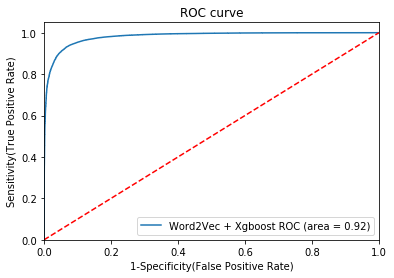

In [11]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, 
                      gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', 
                      nthread=4, scale_pos_weight=1)
model.fit(X_train_vec, y_train)
y_pred=model.predict(X_test_vec)


print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred)))
conf_mat =confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n%s" % conf_mat)
conf_mat_norm = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion matrix:\n%s" % conf_mat_norm)


plt.figure()

# Compute False postive rate, and True positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_vec)[:,1])
# Calculate Area under the curve to display on the plot
auc = metrics.roc_auc_score(y_test,model.predict(X_test_vec))
# Now, plot the computed values
plt.plot(fpr, tpr, label='%s + %s ROC (area = %0.2f)' % ('Word2Vec', 'Xgboost', auc))
        
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()   # Display

In [93]:
# import keras
from keras.models import Sequential
from keras import layers

model = Sequential([
#     layers.Embedding(tokenizer.vocab_size,64)
    layers.Dense(128, activation='relu', input_dim=160),
#     layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
#     layers.Bidirectional(layers.LSTM(32)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 128)               20608     
_________________________________________________________________
dense_119 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_58 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 6)                 390       
_________________________________________________________________
dropout_59 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 7         
Total params: 29,261
Trainable params: 29,261
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model.fit(X_train_vec, 
                    y_train, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=2, 
                    validation_split=0.1
)

Train on 204890 samples, validate on 22766 samples
Epoch 1/100
 - 12s - loss: 0.1795 - acc: 0.9338 - val_loss: 0.1577 - val_acc: 0.9405
Epoch 2/100
 - 10s - loss: 0.1581 - acc: 0.9419 - val_loss: 0.1531 - val_acc: 0.9425
Epoch 3/100
 - 10s - loss: 0.1526 - acc: 0.9447 - val_loss: 0.1574 - val_acc: 0.9415
Epoch 4/100
 - 10s - loss: 0.1483 - acc: 0.9456 - val_loss: 0.1638 - val_acc: 0.9422
Epoch 5/100
 - 10s - loss: 0.1457 - acc: 0.9472 - val_loss: 0.1675 - val_acc: 0.9430
Epoch 6/100
 - 10s - loss: 0.1431 - acc: 0.9488 - val_loss: 0.1627 - val_acc: 0.9432
Epoch 7/100
 - 10s - loss: 0.1410 - acc: 0.9494 - val_loss: 0.1534 - val_acc: 0.9433
Epoch 8/100
 - 10s - loss: 0.1388 - acc: 0.9502 - val_loss: 0.1862 - val_acc: 0.9405
Epoch 9/100
 - 10s - loss: 0.1375 - acc: 0.9513 - val_loss: 0.1611 - val_acc: 0.9425
Epoch 10/100
 - 10s - loss: 0.1357 - acc: 0.9518 - val_loss: 0.1789 - val_acc: 0.9424
Epoch 11/100
 - 10s - loss: 0.1338 - acc: 0.9530 - val_loss: 0.1830 - val_acc: 0.9423
Epoch 12/100

Epoch 96/100
 - 10s - loss: 0.1275 - acc: 0.9667 - val_loss: 0.4345 - val_acc: 0.9360
Epoch 97/100
 - 10s - loss: 0.1265 - acc: 0.9666 - val_loss: 0.3924 - val_acc: 0.9361
Epoch 98/100
 - 10s - loss: 0.1275 - acc: 0.9665 - val_loss: 0.4053 - val_acc: 0.9350
Epoch 99/100
 - 10s - loss: 0.1299 - acc: 0.9671 - val_loss: 0.3664 - val_acc: 0.9356
Epoch 100/100
 - 10s - loss: 0.1298 - acc: 0.9669 - val_loss: 0.4091 - val_acc: 0.9346


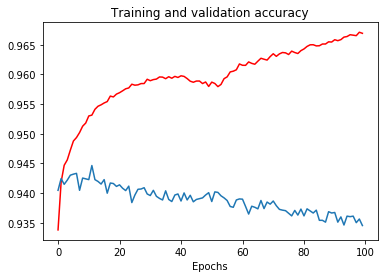

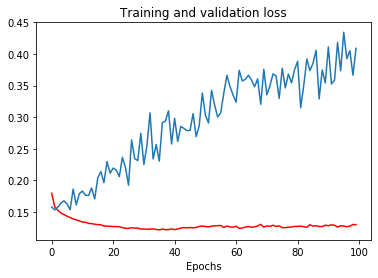

In [95]:
import matplotlib.pyplot as plt

def plot_graphs(history,string1,string2,title):
    plt.plot(epochs, history.history[string1],'r')
    plt.plot(epochs, history.history[string2])
    plt.xlabel("Epochs")
#     plt.ylabel(string1)
    plt.title(title)
    plt.show()
    
plot_graphs(history,'acc','val_acc','Training and validation accuracy')
plot_graphs(history,'loss','val_loss','Training and validation loss')

In this picture, we might say that the model should not train too many time. Training 5 epochs is enough, so let do it!

In [96]:
history = model.fit(X_train_vec, 
                    y_train, 
                    epochs=5, 
                    batch_size=32, 
                    verbose=2, 
                    validation_split=0.1
)

Train on 204890 samples, validate on 22766 samples
Epoch 1/5
 - 10s - loss: 0.1290 - acc: 0.9671 - val_loss: 0.3790 - val_acc: 0.9356
Epoch 2/5
 - 10s - loss: 0.1264 - acc: 0.9667 - val_loss: 0.4231 - val_acc: 0.9360
Epoch 3/5
 - 10s - loss: 0.1261 - acc: 0.9673 - val_loss: 0.4027 - val_acc: 0.9351
Epoch 4/5
 - 10s - loss: 0.1275 - acc: 0.9674 - val_loss: 0.4114 - val_acc: 0.9354
Epoch 5/5
 - 10s - loss: 0.1245 - acc: 0.9674 - val_loss: 0.3845 - val_acc: 0.9354


In [97]:
score = model.evaluate(X_test_vec, y_test, batch_size=128, verbose=2)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.36269600718956907
Test accuracy: 0.9338311517520329


Look! Word2Vec + Keras/Xgboost are much better than previous combinations. Until now, I have used most popular Vectorization methods nad models including Logistic Regression, Random Forest, boosting tree, deep neural network and Xgboost. I learned way more than I thought before, and I believe this is a good start! In the future, I would learn more about these models and force more on Model tuning parameter and the design of layer in deep learning. 

Thank you for time to read my project.  

## Reference

Finally, Thanks these blogs or codes, they help me really a lot. I am really appreciate that these authors show their thoughts all the time, which also should be learned. I listed them here, and hope they would be helpful for you, too. <br />

https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568  <br />
https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4 <br />
https://medium.com/district-data-labs/modern-methods-for-sentiment-analysis-694eaf725244 <br />
https://github.com/tensorflow/workshops/blob/master/extras/keras-bag-of-words/keras-bow-model.ipynb <br />
https://github.com/RaRe-Technologies/movie-plots-by-genre/blob/master/ipynb_with_output/Document%20classification%20with%20word%20embeddings%20tutorial%20-%20with%20output.ipynb<br />
https://www.coursera.org/specializations/tensorflow-in-practice